In [1]:
!pip install yellowbrick




In [204]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
import statsmodels.formula.api as sm
import scipy.stats as stats
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix


In [205]:
Election_orgi=pd.read_excel(r"Downloads\Election_Data.xlsx")

In [206]:
Election_orgi.head()

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."


In [207]:
Election_orgi=pd.read_excel(r"Downloads\Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [208]:
Election_orgi.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [209]:
Election_orgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [210]:
Election=Election_orgi.drop("Unnamed: 0",axis=1)

In [211]:
Election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [212]:
Election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [213]:
Election.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [214]:
Election.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [215]:
Election.describe(include="object")

,vote,gender
count,1525,1525
unique,2,2
top,Labour,female
freq,1063,812


In [216]:
Election.duplicated().sum()

8

In [217]:
Election.drop_duplicates(inplace=True)

In [218]:
Election.shape

(1517, 9)

In [219]:
Election.groupby(by=['gender']).vote.value_counts()

gender  vote        
female  Labour          551
        Conservative    257
male    Labour          506
        Conservative    203
Name: vote, dtype: int64

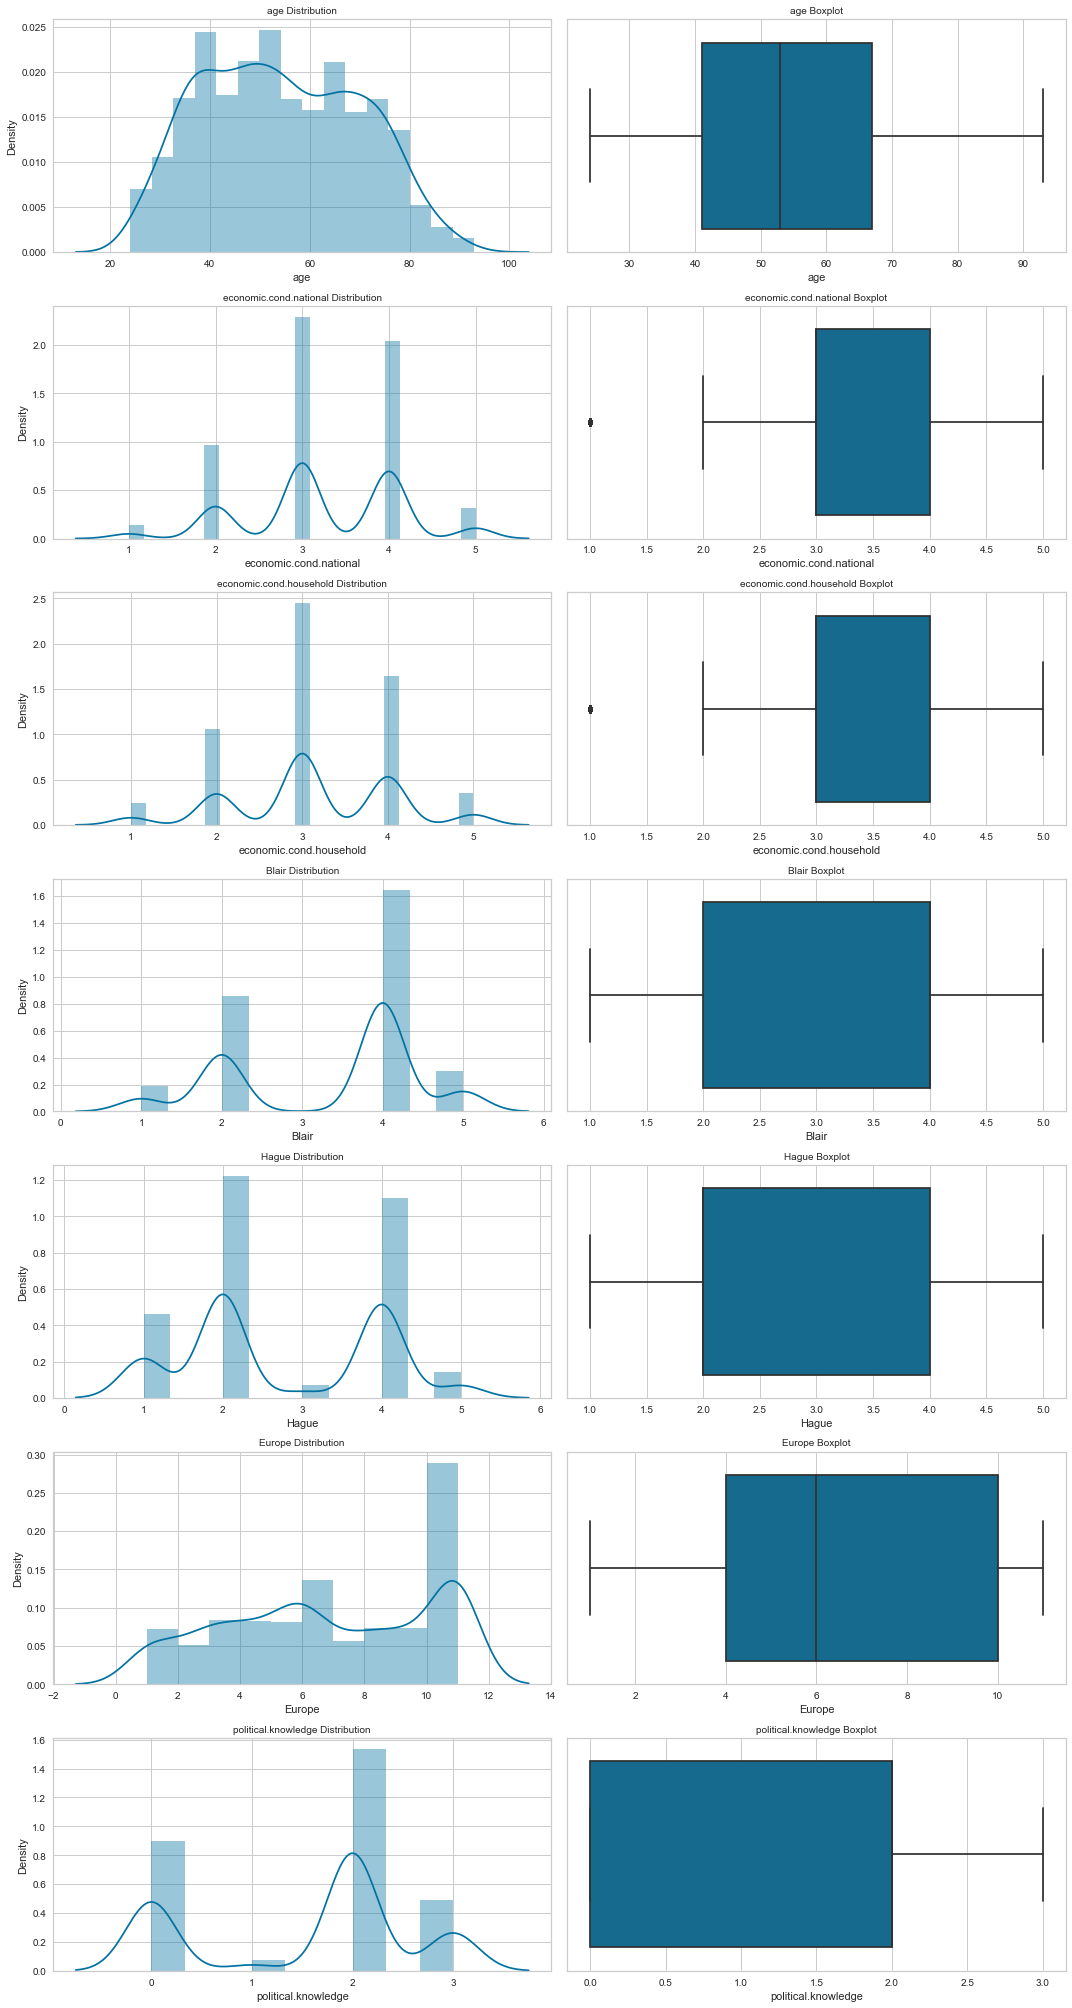

In [220]:
b = ['age', 'economic.cond.national', 'economic.cond.household',
                   'Blair', 'Hague', 'Europe', 'political.knowledge']

num_rows = len(b)
num_cols = 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4*num_rows))

for idx, column in enumerate(b):
    row = idx
    col = 0
    
    a = sns.distplot(Election[column], ax=axes[row][col])
    a.set_title(f"{column} Distribution", fontsize=10)
    
    col = 1
    a = sns.boxplot(Election[column], orient="v", ax=axes[row][col])
    a.set_title(f"{column} Boxplot", fontsize=10)

plt.tight_layout()
plt.show()


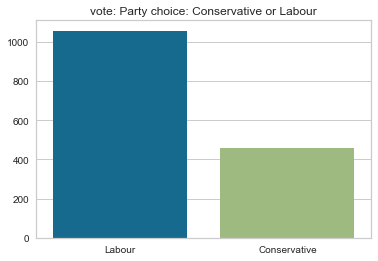

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64


In [221]:
sns.barplot(Election.vote.value_counts().index,Election.vote.value_counts().values)
plt.title("vote: Party choice: Conservative or Labour")
plt.show()
print(Election.vote.value_counts(normalize=True))

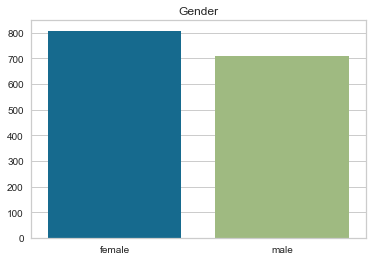

female    0.53263
male      0.46737
Name: gender, dtype: float64


In [222]:
sns.barplot(Election.gender.value_counts().index,Election.gender.value_counts().values)
plt.title("Gender")
plt.show()
print(Election.gender.value_counts(normalize=True))

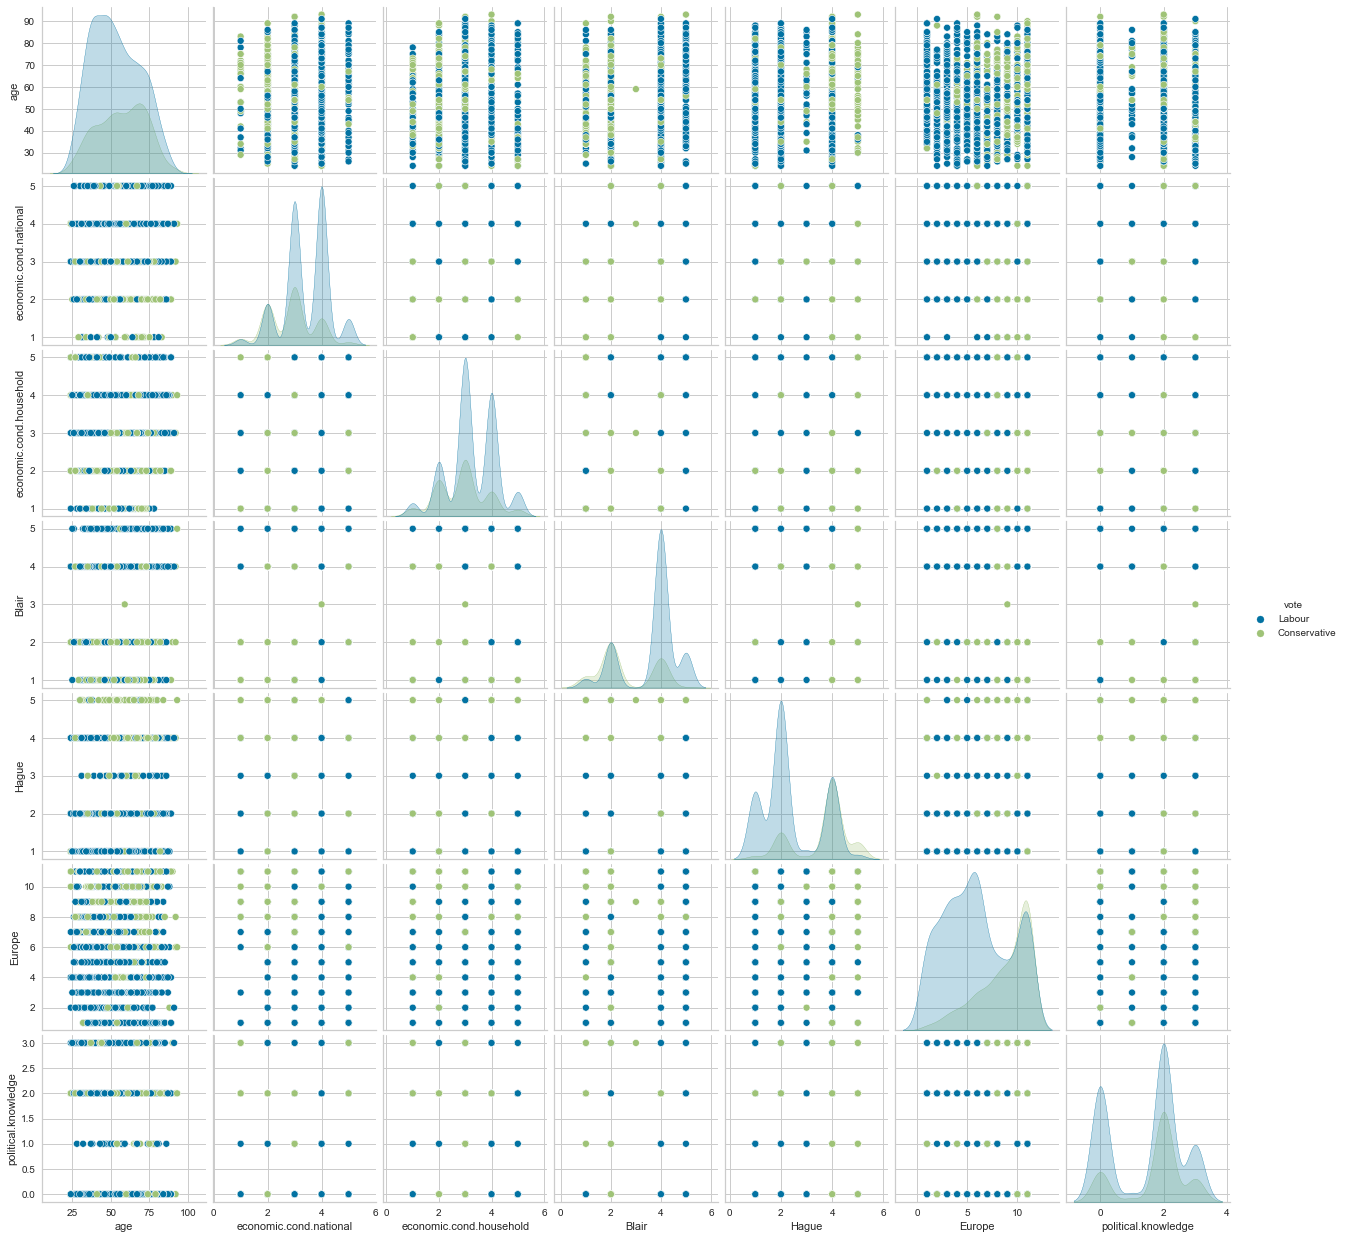

In [223]:
sns.pairplot(Election,hue='vote')

<Axes: >

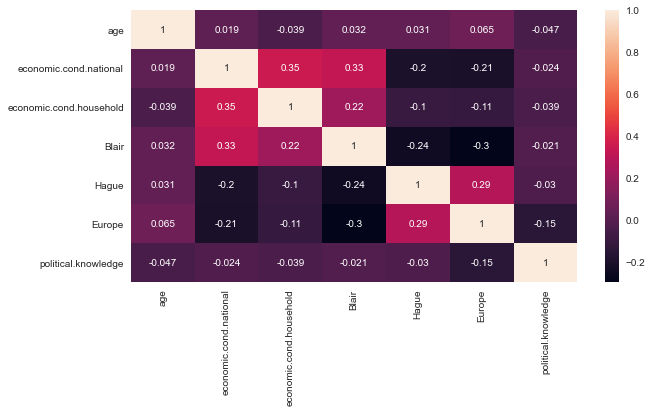

In [224]:
plt.figure(figsize=(10,5))
sns.heatmap(Election.corr(),annot=True)


Text(0.5, 1.0, 'vote vs economic.cond.national')

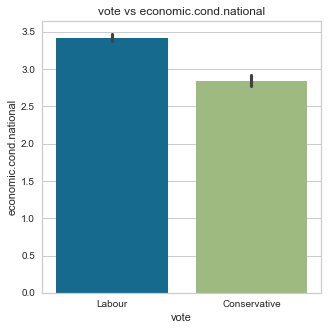

In [225]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x='vote', y='economic.cond.national',data=Election)
plt.title("vote vs economic.cond.national")

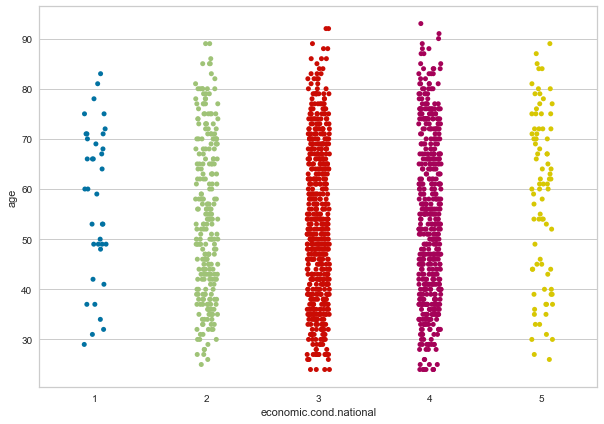

In [226]:
plt.figure(figsize=(10,7))
sns.stripplot(Election["economic.cond.national"], Election["age"], jitter=True) 
plt.show()


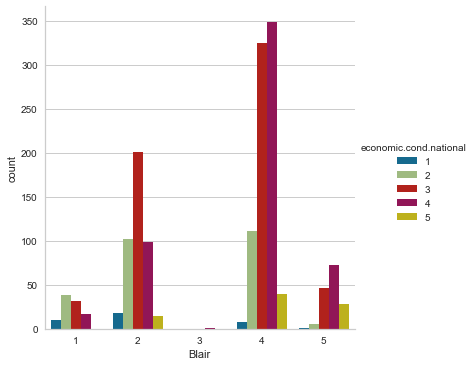

In [227]:
sns.catplot(x="Blair", kind="count",hue='economic.cond.national',data=Election)

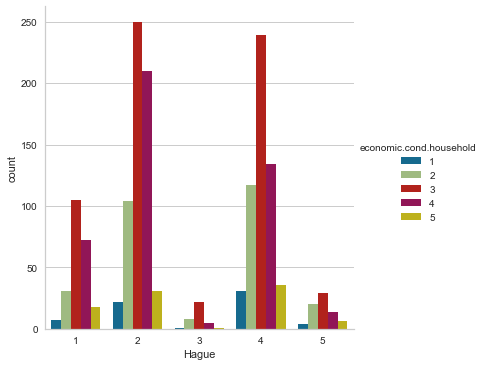

In [228]:
sns.catplot(x="Hague", kind="count",hue='economic.cond.household',data=Election)

In [229]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [230]:
dtypes=Election.dtypes[(Election.dtypes!= 'object')].index
for column in Election[dtypes].columns:
    lr,ur=remove_outlier(Election[column])
    Election[column]=np.where(Election[column]>ur,ur,Election[column])
    Election[column]=np.where(Election[column]<lr,lr,Election[column])

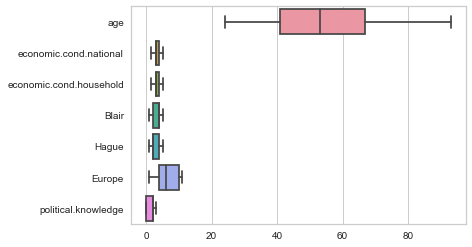

In [231]:
sns.boxplot(data=Election,orient="h")
plt.show()

In [232]:
for feature in Election.columns: 
    if Election[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(Election[feature].unique()))
        print(pd.Categorical(Election[feature].unique()).codes)
        Election[feature] = pd.Categorical(Election[feature]).codes




feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [233]:
Election.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,0,67.0,5.0,3.0,2.0,4.0,11.0,3.0,1
1521,0,73.0,2.0,2.0,4.0,4.0,8.0,2.0,1
1522,1,37.0,3.0,3.0,5.0,4.0,2.0,2.0,1
1523,0,61.0,3.0,3.0,1.0,4.0,11.0,2.0,1
1524,0,74.0,2.0,3.0,2.0,4.0,11.0,0.0,0


In [234]:
Election['age']=Election['age'].astype(int)
Election['economic.cond.national']=Election['economic.cond.national'].astype(int)
Election['economic.cond.household']=Election['economic.cond.household'].astype(int)
Election['Blair']=Election['Blair'].astype(int)
Election['Hague']=Election['Hague'].astype(int)
Election['Europe']=Election['Europe'].astype(int)
Election['political.knowledge']=Election['political.knowledge'].astype(int)

In [235]:
Election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int32
 2   economic.cond.national   1517 non-null   int32
 3   economic.cond.household  1517 non-null   int32
 4   Blair                    1517 non-null   int32
 5   Hague                    1517 non-null   int32
 6   Europe                   1517 non-null   int32
 7   political.knowledge      1517 non-null   int32
 8   gender                   1517 non-null   int8 
dtypes: int32(7), int8(2)
memory usage: 88.6 KB


In [236]:
Election['age']=Election['age'].astype("int64")
Election['economic.cond.national']=Election['economic.cond.national'].astype("int64")
Election['economic.cond.household']=Election['economic.cond.household'].astype("int64")
Election['Blair']=Election['Blair'].astype("int64")
Election['Hague']=Election['Hague'].astype("int64")
Election['Europe']=Election['Europe'].astype("int64")
Election['political.knowledge']=Election['political.knowledge'].astype("int64")
Election['vote']=Election['vote'].astype("int64")
Election['gender']=Election['gender'].astype("int64")

In [237]:
Election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int64
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int64
dtypes: int64(9)
memory usage: 150.8 KB


In [238]:
X = Election.drop('vote', axis=1)

y = Election['vote']

In [239]:
X

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...
1520,67,5,3,2,4,11,3,1
1521,73,2,2,4,4,8,2,1
1522,37,3,3,5,4,2,2,1
1523,61,3,3,1,4,11,2,1


In [240]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1520    0
1521    0
1522    1
1523    0
1524    0
Name: vote, Length: 1517, dtype: int64

In [241]:
y = pd.DataFrame(Election['vote'])

In [242]:
y

,vote
0,1
1,1
2,1
3,1
4,1
...,...
1520,0
1521,0
1522,1
1523,0


In [243]:
from scipy.stats import zscore

X_scaled=X
y_new = y
X_scaled["age"] = zscore(X_scaled["age"])

In [244]:
X_scaled["age"]

0      -0.716161
1      -1.162118
2      -1.225827
3      -1.926617
4      -0.843577
          ...   
1520    0.812836
1521    1.195085
1522   -1.098410
1523    0.430587
1524    1.258794
Name: age, Length: 1517, dtype: float64

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [246]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (1061, 8)
The training set for the dependent variable: (1061, 1)
The test set for the independent variables: (456, 8)
The test set for the dependent variable: (456, 1)


In [247]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X_scaled, y_new, test_size=0.30 , random_state=1)

# logistic regression before scaling

In [248]:
# Fit the Logistic Regression model
modellr = LogisticRegression()
modellr.fit(X_train, y_train)

LogisticRegression()

# Predicting on Training and Test dataset


In [249]:
ytrain_predictlr = modellr.predict(X_train)
ytest_predictlr = modellr.predict(X_test)

# Getting the Predicted Classes and Probs

In [250]:
ytest_predict_problr=modellr.predict_proba(X_test)
pd.DataFrame(ytest_predict_problr).head()

,0,1
0,0.423172,0.576828
1,0.150181,0.849819
2,0.007374,0.992626
3,0.833312,0.166688
4,0.070138,0.929862


# Model Evaluation

In [251]:
modellr.score(X_train, y_train)

0.8312912346842601

In [252]:
modellr.score(X_test, y_test)

0.8355263157894737

# Applying GridSearchCV for Logistic Regression

In [253]:
grid1={'penalty':['l2','none'],
      'solver':['newton-cg',  'saga'],
      'max_iter':[10000,100000],
      'tol':[0.0001,0.001]
     }

In [254]:
modellr1 = LogisticRegression()

In [255]:
grid_searchlr = GridSearchCV(estimator = modellr1, param_grid = grid1, cv = 3,n_jobs=-1,scoring='accuracy')

In [256]:
grid_searchlr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10000, 100000], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'saga'],
                         'tol': [0.0001, 0.001]},
             scoring='accuracy')

In [257]:
print(grid_searchlr.best_params_,'\n')
print(grid_searchlr.best_estimator_)

{'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, solver='newton-cg')


In [258]:
best_modellr = grid_searchlr.best_estimator_

# Prediction


In [259]:
ytrain_predictlr = best_modellr.predict(X_train)
ytest_predictlr = best_modellr.predict(X_test)

# The probabilities on the test set


In [260]:
ytrain_predict_problr=best_modellr.predict_proba(X_train)
pd.DataFrame(ytrain_predict_problr).head()

,0,1
0,0.930153,0.069847
1,0.098653,0.901347
2,0.298719,0.701281
3,0.112250,0.887750
4,0.017905,0.982095


In [261]:
ytest_predict_problr=best_modellr.predict_proba(X_test)
pd.DataFrame(ytest_predict_problr).head()

,0,1
0,0.423154,0.576846
1,0.150177,0.849823
2,0.007374,0.992626
3,0.833315,0.166685
4,0.070139,0.929861


In [262]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lr_train= best_modellr.score(X_train, y_train)
accuracy_lr_train


0.8312912346842601

In [263]:
accuracy_lr_test= best_modellr.score(X_test, y_test)
accuracy_lr_test


0.8355263157894737

In [264]:
#Finding the Intercept of the Final Model 
print("The intercept for the model is :",best_modellr.intercept_)

The intercept for the model is : [1.26497387]


In [265]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_modellr.coef_[0][idx]))

The coefficient for age is -0.23271304779231494
The coefficient for economic.cond.national is 0.6285844283087529
The coefficient for economic.cond.household is 0.06324265467366959
The coefficient for Blair is 0.6007162474217334
The coefficient for Hague is -0.8231886776961427
The coefficient for Europe is -0.2116674456980624
The coefficient for political.knowledge is -0.32193521834814426
The coefficient for gender is 0.19200247767643372


Feature: 0, Score: -0.23271
Feature: 1, Score: 0.62858
Feature: 2, Score: 0.06324
Feature: 3, Score: 0.60072
Feature: 4, Score: -0.82319
Feature: 5, Score: -0.21167
Feature: 6, Score: -0.32194
Feature: 7, Score: 0.19200


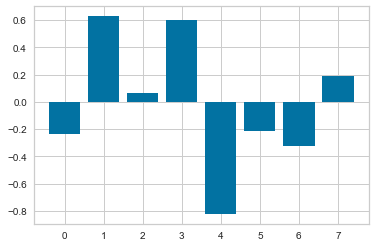

In [266]:
#Feature Importance Graphs
importance = best_modellr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [267]:
# concatenate X and y into a single dataframe
data_train1 = pd.concat([X_train, y_train], axis=1)
data_test1=pd.concat([X_test,y_test],axis=1)
data_train1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote
991,-1.289535,2,4,1,4,11,2,0,0
1274,-0.907286,4,3,4,4,6,0,1,1
649,0.430587,4,3,4,4,7,2,0,0
677,-0.461328,3,3,4,2,11,0,1,1
538,-0.652453,5,3,4,2,8,0,1,1


# logistic regression after scaling

In [268]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_trains, y_trains)

LogisticRegression()

In [269]:
ytrain_predict = model.predict(X_trains)
ytest_predict = model.predict(X_tests)

In [270]:
ytest_predict_prob=model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.423172,0.576828
1,0.150181,0.849819
2,0.007374,0.992626
3,0.833312,0.166688
4,0.070138,0.929862


In [271]:
# Accuracy - Training Data
model.score(X_trains, y_trains)

0.8312912346842601

In [272]:
model.score(X_tests, y_tests)

0.8355263157894737

In [273]:
grid={'penalty':['l2'],
      'solver':['saga'],
      'max_iter':[1000,100],
      'tol':[0.00001,0.001]
     }


In [274]:
model1 = LogisticRegression()

In [275]:
grid_search = GridSearchCV(estimator = model1, param_grid = grid, cv = 7,n_jobs=-1,scoring='accuracy')

In [276]:
grid_search.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [1000, 100], 'penalty': ['l2'],
                         'solver': ['saga'], 'tol': [1e-05, 0.001]},
             scoring='accuracy')

In [277]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga', 'tol': 1e-05} 

LogisticRegression(max_iter=1000, solver='saga', tol=1e-05)


In [278]:
best_model = grid_search.best_estimator_

# Prediction on the training and test set


In [279]:
ytrain_predictlr1 = best_model.predict(X_trains)
ytest_predictlr1 = best_model.predict(X_tests)

In [280]:
ytest_predict_prob=model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.423172,0.576828
1,0.150181,0.849819
2,0.007374,0.992626
3,0.833312,0.166688
4,0.070138,0.929862


In [281]:
# Accuracy - Training Data
model.score(X_trains, y_trains)

0.8312912346842601

In [282]:
model.score(X_tests, y_tests)

0.8355263157894737

In [283]:
grid={'penalty':['l2'],
      'solver':['saga'],
      'max_iter':[1000,100],
      'tol':[0.00001,0.001]
     }

In [284]:
model1 = LogisticRegression()

In [285]:
grid_search = GridSearchCV(estimator = model1, param_grid = grid, cv = 7,n_jobs=-1,scoring='accuracy')

In [286]:
grid_search.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [1000, 100], 'penalty': ['l2'],
                         'solver': ['saga'], 'tol': [1e-05, 0.001]},
             scoring='accuracy')

In [287]:
print(grid_search.best_estimator_)

LogisticRegression(max_iter=1000, solver='saga', tol=1e-05)


In [288]:
best_model = grid_search.best_estimator_

In [289]:
ytrain_predictlr1 = best_model.predict(X_trains)
ytest_predictlr1 = best_model.predict(X_tests)

In [290]:
ytrain_predict_prob1=best_model.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob1).head()

,0,1
0,0.930160,0.069840
1,0.098630,0.901370
2,0.298615,0.701385
3,0.112254,0.887746
4,0.017899,0.982101


In [291]:
ytest_predict_prob1=best_model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.423276,0.576724
1,0.150187,0.849813
2,0.007369,0.992631
3,0.833372,0.166628
4,0.070075,0.929925


In [292]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lr_train= best_model.score(X_trains, y_trains)
accuracy_lr_train


0.8312912346842601

In [293]:
accuracy_lr_test= best_model.score(X_tests, y_tests)
accuracy_lr_test


0.8355263157894737

In [294]:
#Finding the Intercept of the Final Model 
print("The intercept for the model is :",best_model.intercept_)

The intercept for the model is : [1.2611579]


In [295]:
for idx, col_name in enumerate(X_trains.columns):
    print("The coefficient for {} is {}".format(col_name, best_model.coef_[0][idx]))


The coefficient for age is -0.23273345875619228
The coefficient for economic.cond.national is 0.6289132547487192
The coefficient for economic.cond.household is 0.06345739949338505
The coefficient for Blair is 0.6008949044009306
The coefficient for Hague is -0.822996297029037
The coefficient for Europe is -0.21158213959439584
The coefficient for political.knowledge is -0.3217937918402638
The coefficient for gender is 0.19210002501148674


Feature: 0, Score: -0.23273
Feature: 1, Score: 0.62891
Feature: 2, Score: 0.06346
Feature: 3, Score: 0.60089
Feature: 4, Score: -0.82300
Feature: 5, Score: -0.21158
Feature: 6, Score: -0.32179
Feature: 7, Score: 0.19210


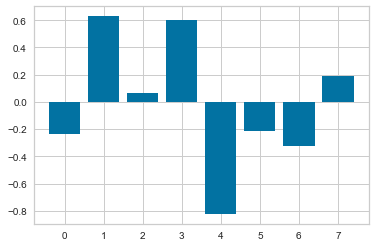

In [296]:
#Feature Importance Graphs
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [297]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_trains, y_trains], axis=1)
data_test=pd.concat([X_tests,y_tests],axis=1)
data_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote
991,-1.289535,2,4,1,4,11,2,0,0
1274,-0.907286,4,3,4,4,6,0,1,1
649,0.430587,4,3,4,4,7,2,0,0
677,-0.461328,3,3,4,2,11,0,1,1
538,-0.652453,5,3,4,2,8,0,1,1


In [298]:
#Statsmodels is a Python module which provides various functions for estimating different statistical models and performing statistical tests
#first, we define the set of dependent(y) and independent(X) variables.  If the dependent variable is in non-numeric form, it is first converted to numeric using encoding
import statsmodels.api as sm 

In [299]:
log_reg = sm.Logit(y_trains, X_trains).fit()

Optimization terminated successfully.
         Current function value: 0.375952
         Iterations 7


In [300]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:                   vote   No. Observations:                 1061
Model:                          Logit   Df Residuals:                     1053
Method:                           MLE   Df Model:                            7
Date:                Sun, 13 Aug 2023   Pseudo R-squ.:                  0.3750
Time:                        23:14:14   Log-Likelihood:                -398.89
converged:                       True   LL-Null:                       -638.26
Covariance Type:            nonrobust   LLR p-value:                 2.950e-99
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.2437      0.091     -2.674      0.007      -0.422      -0.065
economic.cond.national      0.7495      0.107      6.987      0.000       0.539       0.960


# LDA

In [301]:
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_trains,y_trains)

In [302]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_lda = model_lda.predict(X_trains)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_lda = model_lda.predict(X_tests)

In [303]:
ytrain_predict_problda1=model_lda.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_problda1).head()

,0,1
0,0.949216,0.050784
1,0.078241,0.921759
2,0.307389,0.692611
3,0.078963,0.921037
4,0.012161,0.987839


In [304]:
ytest_predict_problda1=model_lda.predict_proba(X_tests)
pd.DataFrame(ytest_predict_problda1).head()

,0,1
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455


In [305]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lda_train= model_lda.score(X_trains, y_trains)
accuracy_lda_train


0.8341187558906692

In [306]:
accuracy_lda_test= model_lda.score(X_tests, y_tests)
accuracy_lda_test


0.8333333333333334

In [307]:
grid_lda={
      'solver':['svd', 'lsqr', 'eigen'],
      
     }

In [308]:
model_lda = LinearDiscriminantAnalysis()

In [309]:
grid_search_lda = GridSearchCV(estimator = model_lda, param_grid = grid_lda, cv = 7,n_jobs=-1,scoring='accuracy')

In [310]:
grid_search_lda.fit(X_trains, y_trains)

GridSearchCV(cv=7, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']},
             scoring='accuracy')

In [311]:
print(grid_search_lda.best_params_,'\n')
print(grid_search_lda.best_estimator_)

{'solver': 'svd'} 

LinearDiscriminantAnalysis()


In [312]:
best_model_lda = grid_search_lda.best_estimator_

In [313]:
ytrain_predictlda = best_model_lda.predict(X_trains)
ytest_predictlda = best_model_lda.predict(X_tests)

In [314]:
ytrain_predictlda

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [315]:
ytrain_predict_problda=best_model_lda.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_problda).head()

,0,1
0,0.949216,0.050784
1,0.078241,0.921759
2,0.307389,0.692611
3,0.078963,0.921037
4,0.012161,0.987839


In [316]:
ytest_predict_problda=best_model_lda.predict_proba(X_tests)
pd.DataFrame(ytest_predict_problda).head()

,0,1
0,0.462093,0.537907
1,0.133955,0.866045
2,0.006414,0.993586
3,0.861210,0.138790
4,0.056545,0.943455


In [317]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lda_train= best_model_lda.score(X_trains, y_trains)
accuracy_lda_train


0.8341187558906692

In [318]:
accuracy_lda_test= best_model_lda.score(X_tests, y_tests)
accuracy_lda_test


0.8333333333333334

# KNN Model

In [319]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors = 15)
KNN_model.fit(X_trains,y_trains)

KNeighborsClassifier(n_neighbors=15)

In [320]:
KNN_model.score(X_trains,y_trains)

0.8463713477851084

In [321]:
KNN_model.score(X_tests,y_tests)

0.831140350877193

In [322]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trains, y_trains)
    # evaluate test accuracy
    scores = knn.score(X_tests, y_tests)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.21271929824561409,
 0.1885964912280702,
 0.17324561403508776,
 0.18201754385964908,
 0.17763157894736847,
 0.17324561403508776,
 0.17324561403508776,
 0.16885964912280704,
 0.17324561403508776,
 0.16666666666666663]

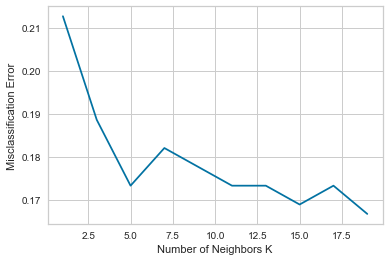

In [323]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [324]:
## Performance Matrix on train data set
y_train_predict_knn = KNN_model.predict(X_trains)
acc_train_knn = KNN_model.score(X_trains, y_trains)
print(acc_train_knn)
print(metrics.confusion_matrix(y_trains, y_train_predict_knn))
print(metrics.classification_report(y_trains, y_train_predict_knn))

0.8463713477851084
[[209  98]
 [ 65 689]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [325]:
## Performance Matrix on test data set
y_test_predict_knn = KNN_model.predict(X_tests)
acc_test_knn = KNN_model.score(X_tests, y_tests)
print(acc_test_knn)
print(metrics.confusion_matrix(y_tests, y_test_predict_knn))
print(metrics.classification_report(y_tests, y_test_predict_knn))

0.831140350877193
[[106  47]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



In [326]:
ytrain_predict_prob_knn=KNN_model.predict_proba(X_trains)
pd.DataFrame(ytrain_predict_prob_knn).head()

,0,1
0,0.933333,0.066667
1,0.133333,0.866667
2,0.266667,0.733333
3,0.000000,1.000000
4,0.000000,1.000000


In [327]:
ytest_predict_prob_knn=KNN_model.predict_proba(X_tests)
pd.DataFrame(ytest_predict_prob_knn).head()

,0,1
0,0.666667,0.333333
1,0.266667,0.733333
2,0.000000,1.000000
3,0.733333,0.266667
4,0.133333,0.866667


# Gaussian Naive Bayes

In [328]:
from sklearn.naive_bayes import GaussianNB

In [329]:
NB_model = GaussianNB()
NB_model.fit(X_trains, y_trains)

GaussianNB()

In [330]:
y_train_predict_nb = NB_model.predict(X_trains)
acc_train_nb = NB_model.score(X_trains, y_trains)                      ## Accuracy
print(acc_train_nb)
print(metrics.confusion_matrix(y_trains, y_train_predict_nb))          ## confusion_matrix
print(metrics.classification_report(y_trains, y_train_predict_nb))  

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [331]:
## Performance Matrix on test data set
y_test_predict_nb = NB_model.predict(X_tests)
acc_test_nb = NB_model.score(X_tests, y_tests)                    ## Accuracy
print(acc_test_nb)
print(metrics.confusion_matrix(y_tests, y_test_predict_nb))         ## confusion_matrix
print(metrics.classification_report(y_tests, y_test_predict_nb))    ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [332]:
model_rf=RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=25,
                       min_samples_split=50, n_estimators=101)
model_bag=BaggingClassifier(base_estimator=model_rf,n_estimators=101,random_state=1)
model_bag.fit(X_trains, y_trains)


BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=4,
                                                        max_features=5,
                                                        min_samples_leaf=25,
                                                        min_samples_split=50,
                                                        n_estimators=101),
                  n_estimators=101, random_state=1)

In [333]:
y_train_predict_bag = model_bag.predict(X_trains)

In [334]:
y_test_predict_bag = model_bag.predict(X_tests)


In [335]:
acc_bag_train =model_bag.score(X_trains, y_trains)
acc_bag_train

0.8369462770970783

In [336]:
acc_bag_test =model_bag.score(X_tests, y_tests)
acc_bag_test

0.8223684210526315

# AdaBoostClassifier

In [337]:
from sklearn.ensemble import AdaBoostClassifier


ADa_model = AdaBoostClassifier(n_estimators=100,random_state=1, learning_rate=1.0, algorithm='SAMME.R')
ADa_model.fit(X_trains,y_trains)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [338]:
y_train_predict_Ada = ADa_model.predict(X_trains)

In [339]:
y_test_predict_Ada = ADa_model.predict(X_tests)


In [340]:
ADa_train =ADa_model.score(X_trains, y_trains)
ADa_train

0.8501413760603205

In [341]:
ADa_test=ADa_model.score(X_tests, y_tests)
ADa_test

0.8135964912280702

# Gradient Boosting

In [342]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(criterion = 'friedman_mse',loss='exponential',max_features=5,
                                min_samples_split=50,n_estimators=101,random_state=1)
gbcl = gbcl.fit(X_trains, y_trains)

In [343]:
y_train_predict_gbcl = gbcl.predict(X_trains)

In [344]:
y_test_predict_gbcl = gbcl.predict(X_tests)


In [345]:
gbcl.score(X_trains, y_trains)

0.8803016022620169

In [346]:
gbcl.score(X_tests, y_tests)

0.8333333333333334

# Logistic Regression Model¶


In [347]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\aprad\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
pip install --upgrade scikit-learn


In [348]:
import sklearn
print(sklearn.__version__)


1.3.0


In [349]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [350]:
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

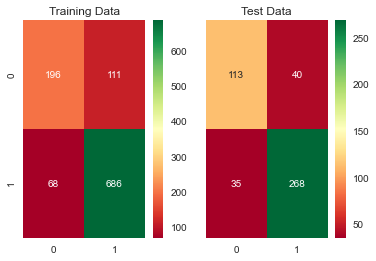

In [351]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_trains,ytrain_predictlr1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_tests,ytest_predictlr1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [352]:
print(classification_report(y_trains, ytrain_predictlr1),'\n');
print(classification_report(y_tests, ytest_predictlr1),'\n');


              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456
 



# AUC and ROC for the training data

AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


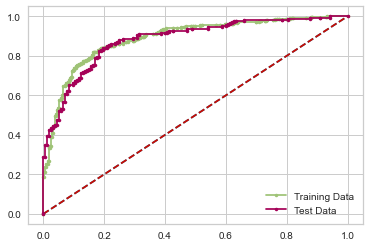

In [353]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lr = metrics.roc_auc_score(y_trains,ytrain_predict_prob1[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_trains,ytrain_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lr = metrics.roc_auc_score(y_tests,ytest_predict_prob1[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lr )

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_tests,ytest_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [354]:
metrics=classification_report(y_trains, ytrain_predictlr1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lr=round(df.loc["1"][0],2)
train_recall_lr=round(df.loc["1"][1],2)
train_f1_lr=round(df.loc["1"][2],2)
print ('LR_train_precision ',train_precision_lr)
print ('LR_train_recall ',train_recall_lr)
print ('LR_train_f1 ',train_f1_lr)


LR_train_precision  0.86
LR_train_recall  0.91
LR_train_f1  0.88


metrics=classification_report(y_tests, ytest_predictlr1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lr=round(df.loc["1"][0],2)
test_recall_lr=round(df.loc["1"][1],2)
test_f1_lr=round(df.loc["1"][2],2)
print ('LR_test_precision ',test_precision_lr)
print ('LR_test_recall ',test_recall_lr)
print ('LR_test_f1 ',test_f1_lr)


# LinearDiscriminantAnalysis

In [355]:
from sklearn.metrics import confusion_matrix

In [356]:
metrics=classification_report(y_trains,pred_class_train_lda,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lda=round(df.loc["1"][0],2)
train_recall_lda=round(df.loc["1"][1],2)
train_f1_lda=round(df.loc["1"][2],2)
print ('LDA_train_precision ',train_precision_lda)
print ('LDA_train_recall ',train_recall_lda)
print ('LDA_train_f1 ',train_f1_lda)


LDA_train_precision  0.86
LDA_train_recall  0.91
LDA_train_f1  0.89


In [357]:
metrics=classification_report(y_tests,pred_class_test_lda,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lda=round(df.loc["1"][0],2)
test_recall_lda=round(df.loc["1"][1],2)
test_f1_lda=round(df.loc["1"][2],2)
print ('LDA_test_precision ',test_precision_lda)
print ('LDA_test_recall ',test_recall_lda)
print ('LDA_test_f1 ',test_f1_lda)

LDA_test_precision  0.86
LDA_test_recall  0.89
LDA_test_f1  0.88


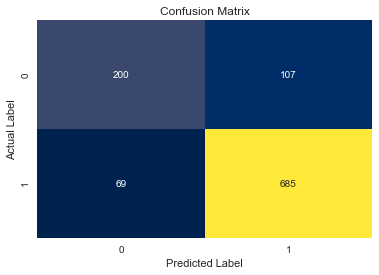

In [358]:
confusion_matrix(y_trains,pred_class_train_lda)
sns.heatmap(confusion_matrix(y_trains,pred_class_train_lda),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

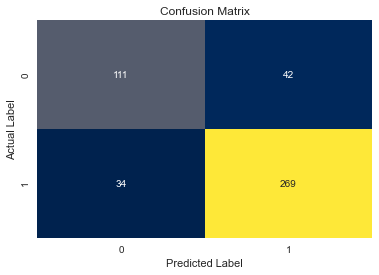

In [359]:
confusion_matrix(y_tests,pred_class_test_lda)
sns.heatmap(confusion_matrix(y_tests,pred_class_test_lda),annot=True, fmt='d',cbar=False, cmap='cividis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [360]:
print(classification_report(y_trains, pred_class_train_lda),'\n');
print(classification_report(y_tests,pred_class_test_lda),'\n');


              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



# KNN Model

In [366]:
metrics=classification_report(y_trains,y_train_predict_knn,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_knn=round(df.loc["1"][0],2)
train_recall_knn=round(df.loc["1"][1],2)
train_f1_knn=round(df.loc["1"][2],2)
print ('knn_train_precision ',train_precision_knn)
print ('knn_train_recall ',train_recall_knn)
print ('knn_train_f1 ',train_f1_knn)


knn_train_precision  0.88
knn_train_recall  0.91
knn_train_f1  0.89


In [367]:
metrics=classification_report(y_tests,y_test_predict_knn,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_knn=round(df.loc["1"][0],2)
test_recall_knn=round(df.loc["1"][1],2)
test_f1_knn=round(df.loc["1"][2],2)
print ('knn_test_precision ',test_precision_knn)
print ('knn_test_recall ',test_recall_knn)
print ('knn_test_f1 ',test_f1_knn)


knn_test_precision  0.85
knn_test_recall  0.9
knn_test_f1  0.88


Text(0.5, 1.0, 'Test Data')

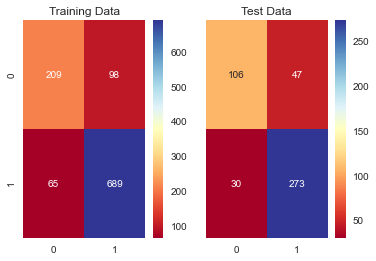

In [369]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

f, a = plt.subplots(1, 2, sharex=True, sharey=True, squeeze=False)

# Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap(confusion_matrix(y_trains, y_train_predict_knn), annot=True, fmt='.5g', cmap='RdYlBu', ax=a[0][0])
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap(confusion_matrix(y_tests, y_test_predict_knn), annot=True, fmt='.5g', cmap='RdYlBu', ax=a[0][1])
a[0][1].set_title('Test Data')


In [370]:
print(classification_report(y_trains,y_train_predict_knn),'\n');
print(classification_report(y_tests,y_test_predict_knn),'\n');


              precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061
 

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



# Gradient Boosting

# Problem 2

In [160]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\aprad\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [161]:
Roosevelt_raw = inaugural.raw('1941-Roosevelt.txt')
Kennedy_raw = inaugural.raw('1961-Kennedy.txt')
Nixon_raw =inaugural.raw('1973-Nixon.txt')

In [162]:
print("The number of characters in Roosevelt speech are:",len(Roosevelt_raw))

The number of characters in Roosevelt speech are: 7571


In [163]:
print("The number of characters in Kennedy speech are:",len(Kennedy_raw))

The number of characters in Kennedy speech are: 7618


In [164]:
print("The number of characters in Nixon speech are:",len(Nixon_raw))

The number of characters in Nixon speech are: 9991


In [165]:
Roosevelt_words = inaugural.words('1941-Roosevelt.txt')
Kennedy_words = inaugural.words('1961-Kennedy.txt')
Nixon_words =inaugural.words('1973-Nixon.txt')

In [166]:
print("The number of Words in Roosevelt speech are:",len(inaugural.words('1941-Roosevelt.txt')))
print("The number of Words in Kennedy speech are:",len(inaugural.words('1961-Kennedy.txt')))
print("The number of Words in Nixon speech are:",len(inaugural.words('1973-Nixon.txt')))


The number of Words in Roosevelt speech are: 1536
The number of Words in Kennedy speech are: 1546
The number of Words in Nixon speech are: 2028


In [167]:
nltk.FreqDist(Roosevelt_words).most_common(10)

[('the', 104),
 ('of', 81),
 (',', 77),
 ('.', 67),
 ('and', 44),
 ('to', 35),
 ('in', 30),
 ('a', 29),
 ('--', 25),
 ('is', 24)]

In [168]:
nltk.FreqDist(Kennedy_words).most_common(10)

[(',', 85),
 ('the', 83),
 ('of', 65),
 ('.', 51),
 ('to', 38),
 ('and', 37),
 ('a', 29),
 ('we', 27),
 ('--', 25),
 ('in', 24)]

In [169]:
nltk.FreqDist(Nixon_words).most_common(10)

[(',', 96),
 ('the', 80),
 ('.', 68),
 ('of', 68),
 ('to', 65),
 ('in', 54),
 ('and', 47),
 ('we', 38),
 ('a', 34),
 ('that', 32)]

In [170]:
!pip install nltk

In [171]:
from nltk.corpus import inaugural

roosevelt_sentences = len(inaugural.sents('1941-Roosevelt.txt'))
kennedy_sentences = len(inaugural.sents('1961-Kennedy.txt'))
nixon_sentences = len(inaugural.sents('1973-Nixon.txt'))

print("The number of sentences in Roosevelt's speech:", roosevelt_sentences)
print("The number of sentences in Kennedy's speech:", kennedy_sentences)
print("The number of sentences in Nixon's speech:", nixon_sentences)


The number of sentences in Roosevelt's speech: 68
The number of sentences in Kennedy's speech: 52
The number of sentences in Nixon's speech: 69


In [172]:
import random
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
st = PorterStemmer()

import json
import re
import string
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aprad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [173]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

stopwords.extend(["--"]) 
all_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]

clean_stem = [st.stem(word) for word in all_words_clean]

Roosevelt_words_freq = nltk.FreqDist(clean_stem)

word_features1 = [item[0] for item in Roosevelt_words_freq.most_common(50)]

In [174]:
print("Most common words in Roosevelt speech after removing stopwords")
print(word_features1)

Most common words in Roosevelt speech after removing stopwords
['nation', 'know', 'peopl', 'spirit', 'life', 'democraci', 'us', 'america', 'live', 'year', 'human', 'freedom', 'measur', 'men', 'govern', 'new', 'bodi', 'mind', 'speak', 'day', 'state', 'american', 'must', 'someth', 'faith', 'unit', 'task', 'preserv', 'within', 'histori', 'three', 'form', 'futur', 'seem', 'hope', 'understand', 'thing', 'free', 'alon', 'still', 'everi', 'contin', 'like', 'person', 'world', 'sacr', 'word', 'came', 'land', 'first']


In [175]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--"]) 

all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]
clean_stem = [st.stem(word) for word in all_words_clean]


kennedy_words_freq = nltk.FreqDist(clean_stem)

word_features2 = [item[0] for item in kennedy_words_freq.most_common(50)]

In [176]:
word_features2

['let',
 'us',
 'power',
 'world',
 'nation',
 'side',
 'new',
 'pledg',
 'ask',
 'citizen',
 'peac',
 'shall',
 'free',
 'final',
 'presid',
 'fellow',
 'freedom',
 'begin',
 'man',
 'hand',
 'human',
 'first',
 'gener',
 'american',
 'war',
 'alway',
 'know',
 'support',
 'unit',
 'cannot',
 'hope',
 'help',
 'weak',
 'arm',
 'countri',
 'call',
 'today',
 'well',
 'god',
 'form',
 'poverti',
 'life',
 'globe',
 'right',
 'state',
 'dare',
 'word',
 'go',
 'friend',
 'bear']

In [177]:
print("Most common words in Kennedy speech after removing stopwords")
print(word_features2)

Most common words in Kennedy speech after removing stopwords
['let', 'us', 'power', 'world', 'nation', 'side', 'new', 'pledg', 'ask', 'citizen', 'peac', 'shall', 'free', 'final', 'presid', 'fellow', 'freedom', 'begin', 'man', 'hand', 'human', 'first', 'gener', 'american', 'war', 'alway', 'know', 'support', 'unit', 'cannot', 'hope', 'help', 'weak', 'arm', 'countri', 'call', 'today', 'well', 'god', 'form', 'poverti', 'life', 'globe', 'right', 'state', 'dare', 'word', 'go', 'friend', 'bear']


In [178]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.extend(["--"]) 

all_words = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
all_words_clean = [word for word in all_words if word not in stopwords]
clean_stem = [st.stem(word) for word in all_words_clean]


Nixon_words_freq = nltk.FreqDist(clean_stem)

word_features3 = [item[0] for item in Nixon_words_freq.most_common(50)]

In [179]:
print("Most common words in Nixon speech after removing stopwords")
print(word_features3)

Most common words in Nixon speech after removing stopwords
['us', 'let', 'america', 'peac', 'world', 'respons', 'new', 'nation', 'govern', 'great', 'year', 'home', 'abroad', 'make', 'togeth', 'shall', 'time', 'polici', 'role', 'right', 'everi', 'histori', 'better', 'come', 'respect', 'peopl', 'live', 'help', 'four', 'war', 'today', 'era', 'progress', 'other', 'build', 'act', 'challeng', 'one', 'mr', 'share', 'meet', 'promis', 'long', 'work', 'preserv', 'freedom', 'place', 'system', 'god', 'way']


In [180]:
print("Top three words in Roosevelt's speech(after removing the stopwords):",nltk.FreqDist(Roosevelt_words_freq).most_common(3))

Top three words in Roosevelt's speech(after removing the stopwords): [('nation', 17), ('know', 10), ('peopl', 9)]


In [181]:
print("Top three words in Kennedy's speech(after removing the stopwords):",nltk.FreqDist(kennedy_words_freq).most_common(3))

Top three words in Kennedy's speech(after removing the stopwords): [('let', 16), ('us', 12), ('power', 9)]


In [182]:
print("Top three words in Nixon's speech(after removing the stopwords):",nltk.FreqDist(Nixon_words_freq).most_common(3))

Top three words in Nixon's speech(after removing the stopwords): [('us', 26), ('let', 22), ('america', 21)]


In [183]:
Roosevelt_df = pd.DataFrame({"Roosevelt":[inaugural.raw('1941-Roosevelt.txt')]})
Kennedy_df =  pd.DataFrame({"Kennedy":[inaugural.raw('1961-Kennedy.txt')]})
Nixon_df =  pd.DataFrame({"Nixon":[inaugural.raw('1973-Nixon.txt')]})

In [184]:
import matplotlib.pyplot as plt

In [185]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')  
stop_words = set(stopwords.words('english'))
stop_words.update(["--"])

print("List of English stopwords:", stop_words)


List of English stopwords: {'couldn', 'at', 'with', 'doing', 'such', 'in', "didn't", 'between', 'of', 'very', 'were', 'be', 'off', 'own', "you've", 'yourselves', "mightn't", 'wouldn', "it's", 'more', 'it', 'until', 'only', 'hers', 'd', 'down', 'as', 'hadn', 'all', 'above', 'nor', "you'll", 'themselves', 'can', 'yours', 'doesn', 'my', 'ma', 'm', 'after', 'being', 'are', 'that', "don't", 'his', "doesn't", 'mustn', "isn't", 'over', 'ourselves', 'she', 'by', 'our', 'under', 'than', 'where', 'no', 'wasn', 'has', 'out', 'how', 'will', 'weren', 'this', 'about', 'a', 'hasn', "you'd", 'himself', 'which', 'once', 'each', 'isn', 'here', 'y', 'have', 'further', 'or', 'mightn', 'shan', 'so', "won't", "weren't", 're', "wasn't", 's', 'too', "haven't", 'during', 'into', 'having', 'most', 'don', "wouldn't", "mustn't", 'if', "should've", 'o', '--', 'yourself', 'haven', 'ours', 'then', 'the', 'below', 'few', 'is', 'am', "hasn't", "shouldn't", 'both', 'been', 'an', 'some', 'their', 'for', 'what', 'not', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aprad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aprad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [195]:
corpus = Roosevelt_df['Roosevelt'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0    On national day inauguration since 1789, peopl...
Name: Roosevelt, dtype: object

In [196]:
wc_a = ' '.join(corpus)

In [188]:
!pip install wordcloud


In [189]:
pip install --upgrade wordcloud


Note: you may need to restart the kernel to use updated packages.


In [190]:
!pip install pytagcloud pygame simplejson


In [191]:
pip install wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.


Word Cloud  (after cleaning)!!


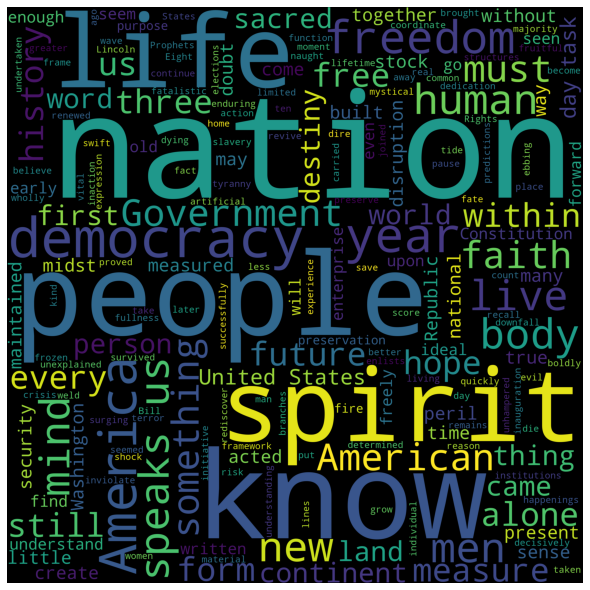

In [377]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud  (after cleaning)!!")
plt.show()


In [197]:
corpus2 = Kennedy_df['Kennedy'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus2

0    Vice President Johnson, Mr. Speaker, Mr. Chief...
Name: Kennedy, dtype: object

In [198]:
wc_a1 = ' '.join(corpus2)

Word Cloud  (after cleaning)!!


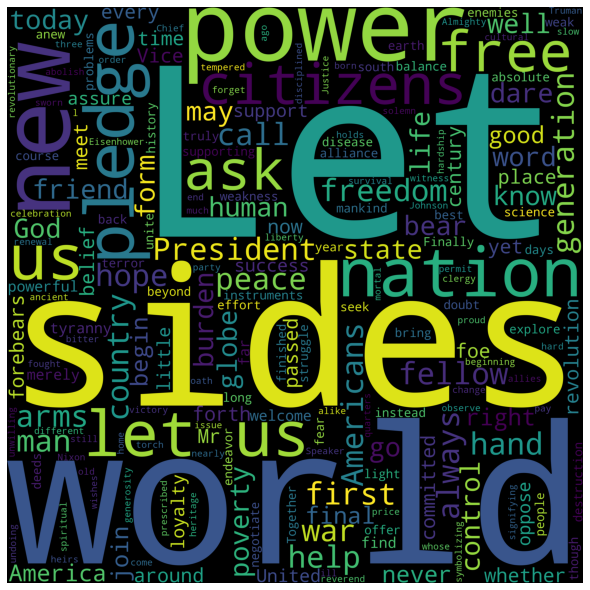

In [199]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud  (after cleaning)!!")
plt.show()


In [200]:
corpus3 = Nixon_df['Nixon'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus3

0    Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
Name: Nixon, dtype: object

In [201]:
wc_a3 = ' '.join(corpus3)

Word Cloud  (after cleaning)!!


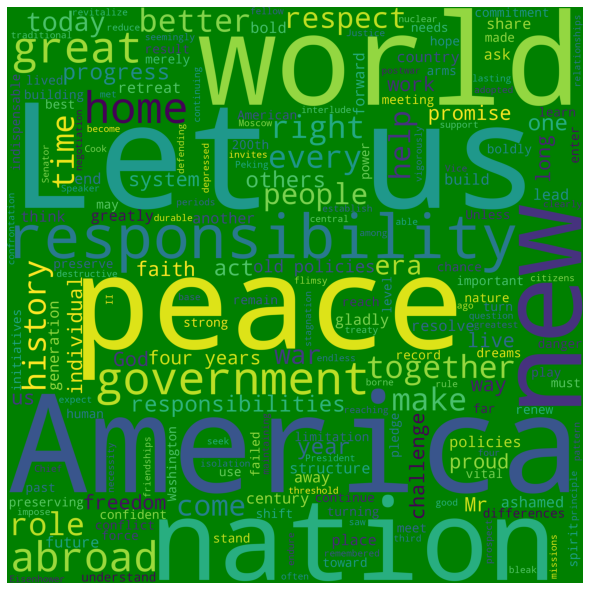

In [378]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='green', 
                min_font_size = 10, random_state=100).generate(wc_a3) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud  (after cleaning)!!")
plt.show()
